## Observations and Insights 

# cancer_drug_analysis

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
combined_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [52]:
# Checking the number of mice.
mouse_count = combined_mouse_study_df["Mouse ID"].nunique()
print(mouse_count)

249


In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_study_df.loc[combined_mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep="first")]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [54]:
# Optional: Get all the data for the duplicate mouse ID. 
# Got help from jezrael's post on: 
# https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas
duplicate_mouse = combined_mouse_study_df[combined_mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_study_df = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] != "g989"]
cleaned_mice_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [56]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = cleaned_mice_study_df["Mouse ID"].nunique()
print(cleaned_mouse_count)

248


## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_volume_mean = cleaned_mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_volume_median = cleaned_mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_volume_var = cleaned_mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_volume_std = cleaned_mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_volume_sem = cleaned_mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary_series_df = pd.DataFrame({ 'Mean': regimen_volume_mean, 'Median': regimen_volume_median, 'Variance': regimen_volume_var, \
                                  'Standard Deviation': regimen_volume_std, 'SEM': regimen_volume_sem} )
regimen_summary_series_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary_df = cleaned_mice_study_df.groupby(["Drug Regimen"], as_index=True).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

# This method produces everything in a single groupby function
regimen_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

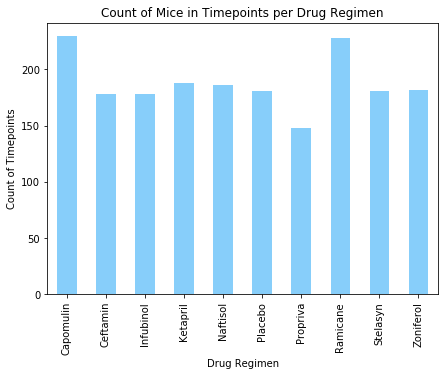

In [59]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Get the counts of Timepoints grouped by Drug Regimen
bar_chart_df = cleaned_mice_study_df.groupby("Drug Regimen")["Timepoint"].count()

# Create the bar chart using pandas
plot_bar = bar_chart_df.plot(kind="bar", color="lightskyblue", title="Count of Mice in Timepoints per Drug Regimen",\
                             figsize=(7, 5), align="center")
plot_bar.set_ylabel("Count of Timepoints")
plt.show()

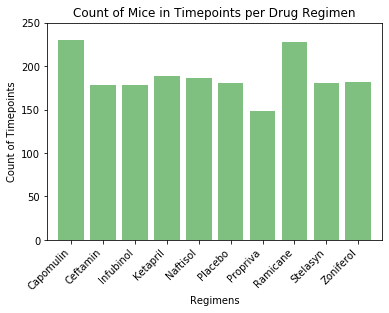

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Use the same data from the pandas bar chart
# set the x-axis labels and tickmarks 
x_axis_labels = bar_chart_df.index
x_axis = np.arange(len(bar_chart_df.index))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis_labels)

# create the bar chart and then pretty it up
bar_chart_plt = plt.bar(x_axis, bar_chart_df.values, color='green', alpha=0.5, align="center")
plt.title("Count of Mice in Timepoints per Drug Regimen")
plt.xlabel("Regimens")
plt.ylabel("Count of Timepoints")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 250)
plt.xticks(rotation=45, ha="right")
plt.show()


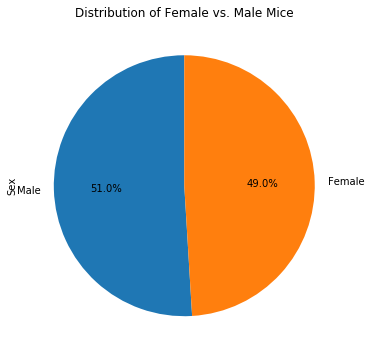

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create the dataset
gender_counts = cleaned_mice_study_df["Sex"].value_counts()

# Create the pie chart
gender_counts.plot(kind="pie", figsize=(6,6), autopct='%1.1f%%', startangle=90, shadow=False, legend=False, \
                   title="Distribution of Female vs. Male Mice")
plt.show()

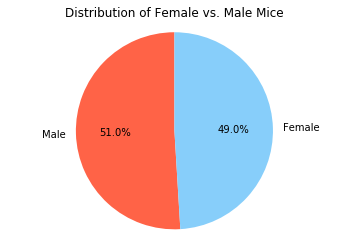

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Use the same data from the pandas version above
# Labels for the sections of the pie chart
labels = gender_counts.index

# The values of each section of the pie chart
size = gender_counts.values

# The colors of each section of the pie chart
colors = ["tomato", "lightskyblue"]
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(size, labels=labels, colors=colors,  
        autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Distribution of Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# look at mouse id and timepoint

# Create list of drug regmimens to filter by
regimen_list = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Get the last Timepoint record for each mouse grouped by Mouse ID and the Drug Regimen
# The 'isin' function help came from https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
filtered_cleaned_mice_df = cleaned_mice_study_df.loc[cleaned_mice_study_df["Drug Regimen"].isin(regimen_list)]
#filtered_cleaned_mice_df

final_tumor_volume = pd.DataFrame(filtered_cleaned_mice_df.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max().reset_index())

# Then filter those by the specific Drug Regimens in the regimen_list
#final_tumor_volume_df = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"].isin(regimen_list)]
#final_tumor_volume_df = pd.DataFrame(final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]])
#final_tumor_volume


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_df = pd.merge(final_tumor_volume, cleaned_mice_study_df, on=["Mouse ID", "Timepoint"], how="inner")
# delete the extra Drug Regimen column and rename the first one to remove the '_x'
del last_tumor_df["Drug Regimen_y"]
last_tumor_df = last_tumor_df.rename(columns={"Drug Regimen_x":"Drug Regimen"})
last_tumor_df


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a275,Ceftamin,45,62.999356,3,Female,20,28
3,a411,Ramicane,45,38.407618,1,Male,3,22
4,a444,Ramicane,45,43.047543,0,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,68.594745,4,Female,6,27
96,y793,Capomulin,45,31.896238,2,Male,17,17
97,y865,Ceftamin,45,64.729837,3,Male,23,26
98,z578,Ramicane,45,30.638696,0,Male,11,16


In [127]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
#tumor_volume = []

# Separate the drug regimens into their own sets
# Locate the rows which contain mice on each drug and get the tumor volumes 
capomulin_df = last_tumor_df.loc[last_tumor_df["Drug Regimen"]=="Capomulin"]
capomulin_only_df = capomulin_df[["Mouse ID", "Tumor Volume (mm3)"]].sort_values(["Tumor Volume (mm3)"]).set_index(["Mouse ID"])

ceftamin_df = last_tumor_df.loc[last_tumor_df["Drug Regimen"]=="Ceftamin"]
ceftamin_only_df = ceftamin_df[["Mouse ID", "Tumor Volume (mm3)"]].sort_values(["Tumor Volume (mm3)"]).set_index(["Mouse ID"])

infubinol_df = last_tumor_df.loc[last_tumor_df["Drug Regimen"]=="Infubinol"]
infubinol_only_df = infubinol_df[["Mouse ID", "Tumor Volume (mm3)"]].sort_values(["Tumor Volume (mm3)"]).set_index(["Mouse ID"])

ramicane_df = last_tumor_df.loc[last_tumor_df["Drug Regimen"]=="Ramicane"]
ramicane_only_df = ramicane_df[["Mouse ID", "Tumor Volume (mm3)"]].sort_values(["Tumor Volume (mm3)"]).set_index(["Mouse ID"])
    
# Determine outliers using upper and lower bounds for each drug regimen and then print the results to the screen:
# Capomulin
ca_quartiles = capomulin_only_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ca_q1 = ca_quartiles[0.25]
ca_q2 = ca_quartiles[0.5]
ca_q3 = ca_quartiles[0.75]
ca_iqr = ca_q3 - ca_q1  
ca_outliers_below = ca_q1 - (1.5 * ca_iqr)
ca_outliers_above = ca_q3 + (1.5 * ca_iqr)

print("--------------------------------------------------------------")
print('\033[1m' + "Capomulin" + '\033[0m')
print("--------------------------------------------------------------")
print(f"The lower quartile value is:  {ca_q1}")
print(f"The median tumor volume (mme) is:  {ca_q2}")
print(f"The upper quartile is:  {ca_q3}")
print(f"The IQR is:  {ca_iqr}")
print(f"Values below {ca_outliers_below} could be outliers.")
print(f"Values above {ca_outliers_above} could be outliers.")
print("--------------------------------------------------------------")

# Ceftamin
ce_quartiles = ceftamin_only_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ce_q1 = ce_quartiles[0.25]
ce_q2 = ce_quartiles[0.5]
ce_q3 = ce_quartiles[0.75]
ce_iqr = ce_q3 - ce_q1  
ce_outliers_below = ce_q1 - (1.5 * ce_iqr)
ce_outliers_above = ce_q3 + (1.5 * ce_iqr)

print('\033[1m' + "Ceftamin" + '\033[0m')
print("--------------------------------------------------------------")
print(f"The lower quartile value is:  {ce_q1}")
print(f"The median tumor volume (mme) is:  {ce_q2}")
print(f"The upper quartile is:  {ce_q3}")
print(f"The IQR is:  {ce_iqr}")
print(f"Values below {ce_outliers_below} could be outliers.")
print(f"Values above {ce_outliers_above} could be outliers.")
print("--------------------------------------------------------------")

# Infubinol
i_quartiles = infubinol_only_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
i_q1 = i_quartiles[0.25]
i_q2 = i_quartiles[0.5]
i_q3 = i_quartiles[0.75]
i_iqr = i_q3 - i_q1  
i_outliers_below = i_q1 - (1.5 * i_iqr)
i_outliers_above = i_q3 + (1.5 * i_iqr)

print('\033[1m' + "Infubinol" + '\033[0m')
print("--------------------------------------------------------------")
print(f"The lower quartile value is:  {i_q1}")
print(f"The median tumor volume (mme) is:  {i_q2}")
print(f"The upper quartile is:  {i_q3}")
print(f"The IQR is:  {i_iqr}")
print(f"Values below {i_outliers_below} could be outliers.")
print(f"Values above {i_outliers_above} could be outliers.")
print("--------------------------------------------------------------")

# Ramicane
r_quartiles = ramicane_only_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
r_q1 = r_quartiles[0.25]
r_q2 = r_quartiles[0.5]
r_q3 = r_quartiles[0.75]
r_iqr = r_q3 - r_q1  
r_outliers_below = r_q1 - (1.5 * r_iqr)
r_outliers_above = r_q3 + (1.5 * r_iqr)

print('\033[1m' + "Ramicane" + '\033[0m')
print("--------------------------------------------------------------")
print(f"The lower quartile value is:  {r_q1}")
print(f"The median tumor volume (mme) is:  {r_q2}")
print(f"The upper quartile is:  {r_q3}")
print(f"The IQR is:  {r_iqr}")
print(f"Values below {r_outliers_below} could be outliers.")
print(f"Values above {r_outliers_above} could be outliers.")
print("--------------------------------------------------------------")


--------------------------------------------------------------
Capomulin
--------------------------------------------------------------
The lower quartile value is:  32.37735684
The median tumor volume (mme) is:  38.125164399999996
The upper quartile is:  40.1592203
The IQR is:  7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------------------------------------------------
Ceftamin
--------------------------------------------------------------
The lower quartile value is:  48.72207785
The median tumor volume (mme) is:  59.85195552
The upper quartile is:  64.29983003
The IQR is:  15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
--------------------------------------------------------------
Infubinol
--------------------------------------------------------------
The lower quartile value is:  54.04860769
The median tumor volume (mme) is:  60

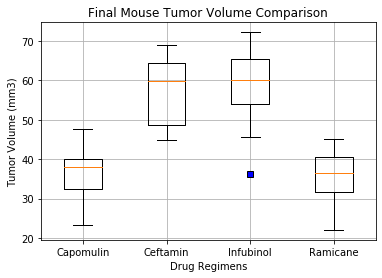

In [152]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Get tumor sizes for each drug
ca_tumor_volume = capomulin_df["Tumor Volume (mm3)"].sort_values(ascending=True)
ce_tumor_volume = ceftamin_df["Tumor Volume (mm3)"].sort_values(ascending=True)
i_tumor_volume = infubinol_df["Tumor Volume (mm3)"].sort_values(ascending=True)
r_tumor_volume = ramicane_df["Tumor Volume (mm3)"].sort_values(ascending=True)

green_diamond = dict(markerfacecolor='b', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Mouse Tumor Volume Comparison')
labels = regimen_list
plt.grid()
ax1.set_xlabel("Drug Regimens")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([ca_tumor_volume,ce_tumor_volume, i_tumor_volume, r_tumor_volume], labels=labels, flierprops=green_diamond)

plt.show()

## Line and Scatter Plots

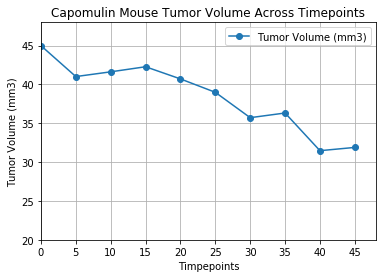

In [70]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Get just one mouse to plot
y793_line = cleaned_mice_study_df.loc[cleaned_mice_study_df["Mouse ID"] == "y793"]
#y793_line

# Create the line plot
                                   
y793_line.plot(x ="Timepoint", y="Tumor Volume (mm3)", kind ="line", title="Capomulin Mouse Tumor Volume Across Timepoints", style='o-')
tick_locations = [value for value in y793_line["Timepoint"]]   
plt.xticks(tick_locations, y793_line["Timepoint"])
plt.xlabel("Timpepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, max(y793_line["Timepoint"])+3)
plt.ylim(20, max(y793_line["Tumor Volume (mm3)"])+3)
plt.grid()
plt.show()

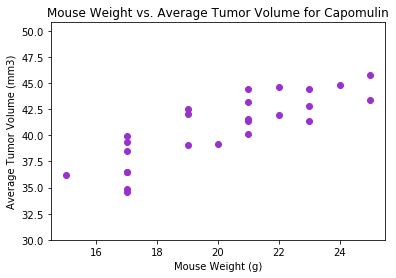

In [194]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Calculate the average tumor volume for each mouse using Capomulin
capomulin_mice_study = cleaned_mice_study_df.loc[cleaned_mice_study_df["Drug Regimen"]=="Capomulin"]   
capomulin_mice_study_df = pd.DataFrame(capomulin_mice_study [["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]])
capomulin_tumor_avg = capomulin_mice_study_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index(drop=False)
capomulin_tumor_avg = capomulin_tumor_avg.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
capomulin_tumor_avg

# Create the scatter plot                                      
x_axis = capomulin_tumor_avg["Weight (g)"].values
y_axis = capomulin_tumor_avg["Average Tumor Volume (mm3)"].values

plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(30, max(y_axis)+5)
plt.scatter(x_axis, y_axis, marker="o", color="darkorchid")
plt.show()


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
